## KNN (K NEIREST NEIGHBOR)

Il Knn è un approccio supervised che classifica degli item sconosciuti in un numero discreto di classi o gruppi basandosi su dati storici e pregressi. Utilizza principalmente la distanza euclidea ma è possibile misurare la distanza anche con il metodo di Hamming o con la similarità del coseno. 
In poche parole ci si basa su classi conosciute, nel caso dell'immagine sottostante sono 3 (Verde, Rossa e blu), si prende una nuova X (nuovo dato che arriverà), si calcolano i k punti più vicini, e si assegna la nuova X alla classe con maggiore punti vicini.
Performa in modo lento all’aumentare delle variabili, cadendo nella famosa maledizione della mutlidimensionalità. Se k = 1 allora l’item più vicino alla all’item della classe appartiene a quel gruppo. Se k = 2 utilizziamo due neighbor se k è maggiore del numero di neighbor effettivi dell’elemento allora quell’elemento farà un gruppo a sé. Per calcolare l’accuratezza del modello utilizzo la matrice di confusione che indicherà i falsi positivi e i falsi negativi.

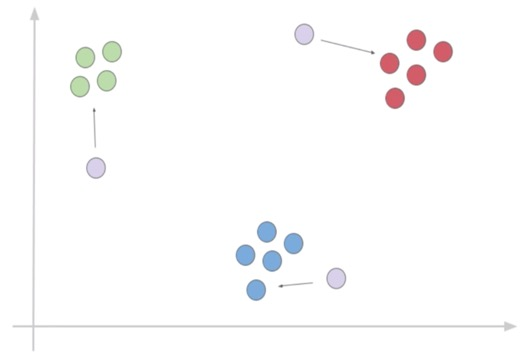

In [2]:
# TIME TO CODE IN PYTHON

In [71]:
#LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [72]:
#LOAD DATASET
dataIris = datasets.load_iris()

#ALCUNI PRINT DEL DATASET
#**********************************
#dataIris.data
#dataIris.data.shape
#print(dataIris.feature_names)
#print(dataIris.target)
#print(dataIris.target_names)
#print(type(dataIris))
#print(dataIris['petal width (cm)'])
#**********************************


#INDICI
#sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target
dfIris = pd.DataFrame(data= np.c_[dataIris['data'], dataIris['target']],columns= dataIris['feature_names'] + ['target'])

dfIris.head()


In [73]:
#DIVIDO I DATI IN TEST E TRAIN (0,80 - 0,20)
cols = ['target']

X = data1.drop(cols, axis=1)
y = data1.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [76]:
#QUANTI NEIGHBORS DEVO TENERE IN CONSIDERAZIONE ?

k_range = range(1,26)
scores = {}
score_list = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[i] = metrics.accuracy_score(y_test, y_pred)
    score_list.append(metrics.accuracy_score(y_test, y_pred))
    

Text(0, 0.5, 'Testing Accuracy')

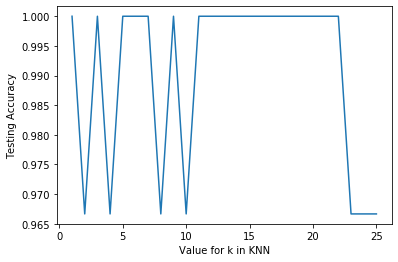

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, score_list)
plt.xlabel('Value for k in KNN')
plt.ylabel('Testing Accuracy')


In [84]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred)



1.0

A questo punto cerchiamo di utilizzare l'algoritmo di classificazione su un caso reale.

In [115]:
dfChurn = pd.read_csv("Data/telcoChurn.csv")
dfChurn.head()

#BACKUP PER PRECAUZIONE DEI DATI 
dfChurnBackup = dfChurn.copy()


In [117]:
#STATISTICAL EXPLORATION

dfChurn.shape
#(7043, 21)

dfChurn.columns
#'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'

dfChurn.isna().any()
#THERE AREN'T Nan VALUES

#FACCIO QUESTO TIPO DI ANALISI PER CAPIRE SE I CLIENTI SONO UNICI O CI SONO CLIENTI CHE SI RIPETONO
len(dfChurn.customerID.unique()) #7043

# IL DATASET E'BILANCIATO CON CHURN SI E CHURN NO ? OPPURE E' SBILANCIATO?

dfChurn.loc[dfChurn['Churn'] == "Yes"].shape #(1869)
dfChurn.loc[dfChurn['Churn'] == "No"].shape #(5174)
#IL DATASET E' COMPLETAMENTE SBILANCIATO

#PIU' CLIENTI UOMINI O PIU' CLIENTI DONNE ?

#dfChurn.loc[dfChurn['gender'] == "Male"].shape #(3555)
#dfChurn.loc[dfChurn['gender'] == "Female"].shape #(3488)
dfChurn.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [179]:
#PER QUESTO ESEMPIO PRENDIAMO COME Y LA VARIABILE CHURN E COME X UNA PORZIONE DELLE VARIABILI, NON TUTTE IN QUANTO E' SOLO A SCOPO DI EDUCATION
dfChurn = dfChurn.replace('No',0)
dfChurn = dfChurn.replace('Yes',1)

y = dfChurn['Churn'] *1



dfChurn.drop([488], axis=0)
#pd.to_numeric(dfChurn['TotalCharges'], errors='raise', downcast=None)


ValueError: Unable to parse string " " at position 488

In [180]:
cols = ['gender','customerID','TotalCharges','Partner','OnlineBackup','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','PaymentMethod','Churn']

X = dfChurn.drop(cols, axis=1)
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.head()

,SeniorCitizen,tenure,MonthlyCharges
1220,0,17,65.75
1131,0,14,64.70
2394,0,71,79.05
1692,0,39,25.25
839,0,44,20.40


In [181]:

X.dtypes


SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
dtype: object

Text(0, 0.5, 'Testing Accuracy')

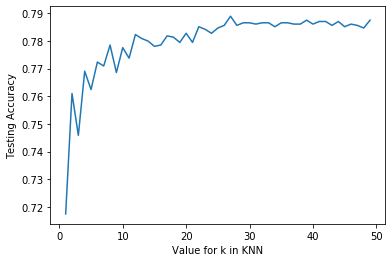

In [182]:

k_range = range(1,50)
scores = {}
score_list = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[i] = metrics.accuracy_score(y_test, y_pred)
    score_list.append(metrics.accuracy_score(y_test, y_pred))
    
%matplotlib inline

plt.plot(k_range, score_list)
plt.xlabel('Value for k in KNN')
plt.ylabel('Testing Accuracy')


In [183]:
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred)


0.7856128726928537